In [2]:
##code from  https://www.kaggle.com/moghazy/eda-for-iris-dataset-with-svm-and-pca 

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import pandas as pd
X = pd.read_csv("./input/Iris.csv")
z = {'Iris-setosa' : 1, 'Iris-versicolor' : 2, 'Iris-virginica' : 3 }

X['Species'] = X['Species'].map(z)
print ("Number of data points ::", X.shape[0])
print("Number of features ::", X.shape[1])

Number of data points :: 150
Number of features :: 6


In [3]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


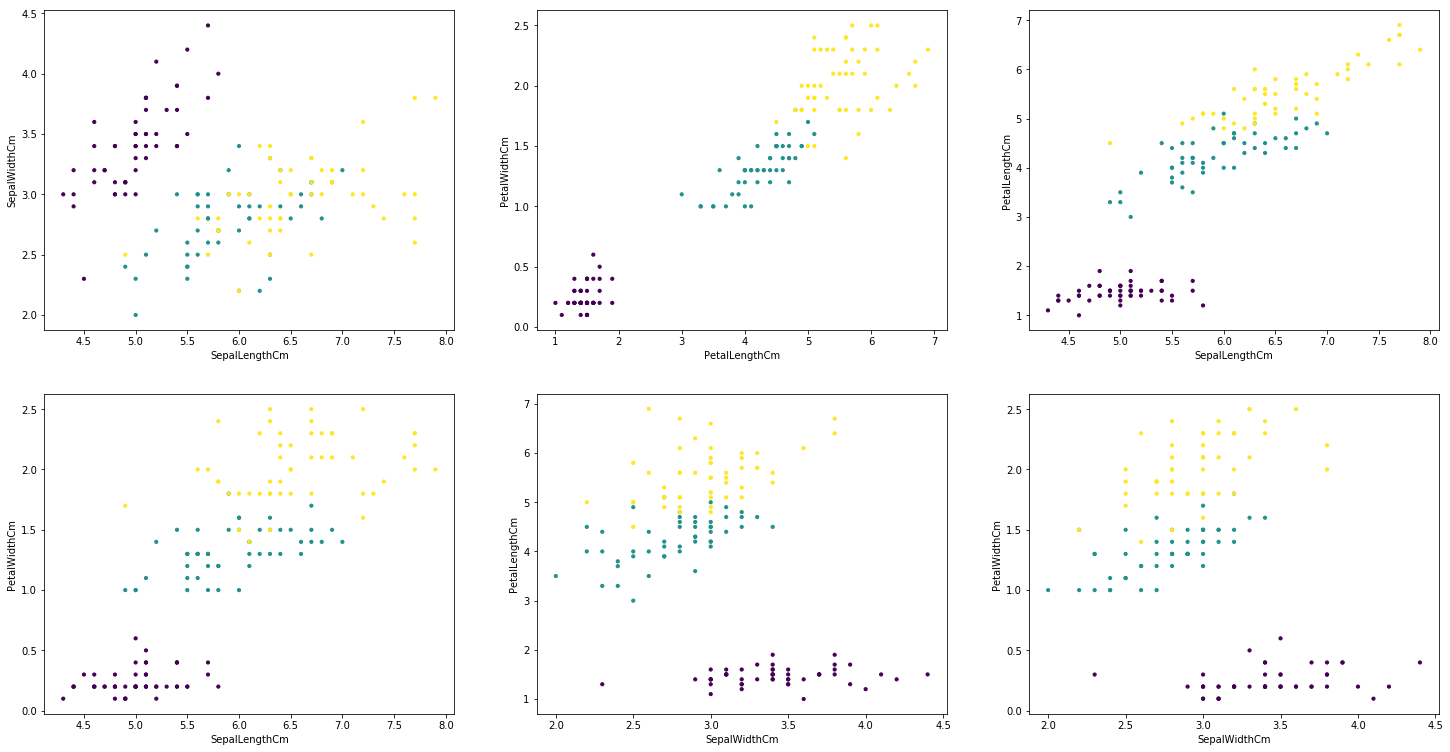

In [10]:
import matplotlib.pyplot as plt
import numpy as np
classes = np.array(list(X.Species.values))
def plotRelation(first_feature, sec_feature):
    
    plt.scatter(first_feature, sec_feature, c = classes, s=10)
    plt.xlabel(first_feature.name)
    plt.ylabel(sec_feature.name)
    
f = plt.figure(figsize=(25,20))
f.add_subplot(331)
plotRelation(X.SepalLengthCm, X.SepalWidthCm)
f.add_subplot(332)
plotRelation(X.PetalLengthCm, X.PetalWidthCm)
f.add_subplot(333)
plotRelation(X.SepalLengthCm, X.PetalLengthCm)
f.add_subplot(334)
plotRelation(X.SepalLengthCm, X.PetalWidthCm)
f.add_subplot(335)
plotRelation(X.SepalWidthCm, X.PetalLengthCm)
f.add_subplot(336)
plotRelation(X.SepalWidthCm, X.PetalWidthCm)

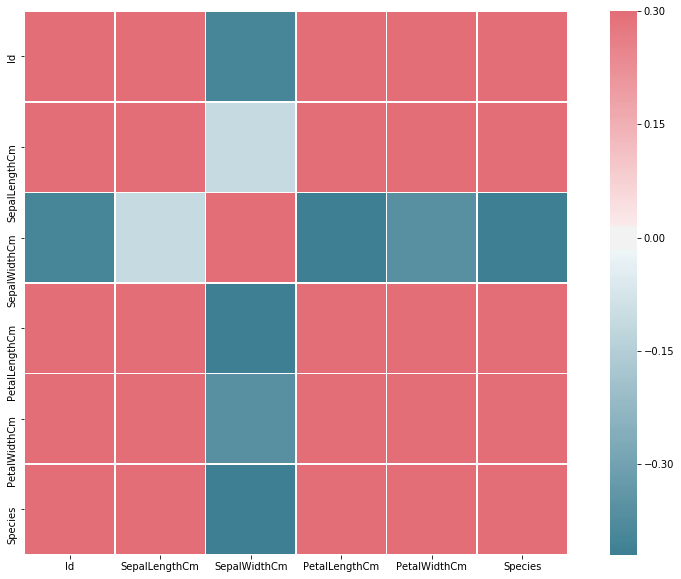

In [11]:
import seaborn as sns


import matplotlib.pyplot as plt


corr = X.corr()
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

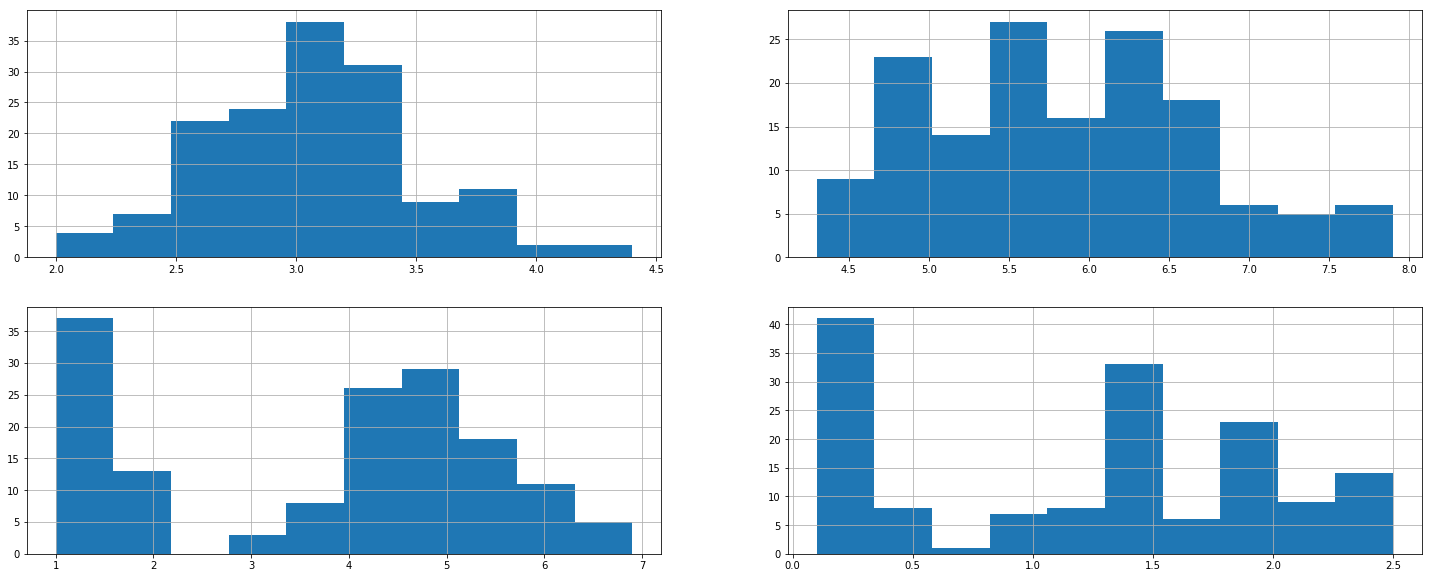

In [12]:
f = plt.figure(figsize=(25,10))
f.add_subplot(221)
X.SepalWidthCm.hist()
f.add_subplot(222)
X.SepalLengthCm.hist()
f.add_subplot(223)
X.PetalLengthCm.hist()
f.add_subplot(224)
X.PetalWidthCm.hist()

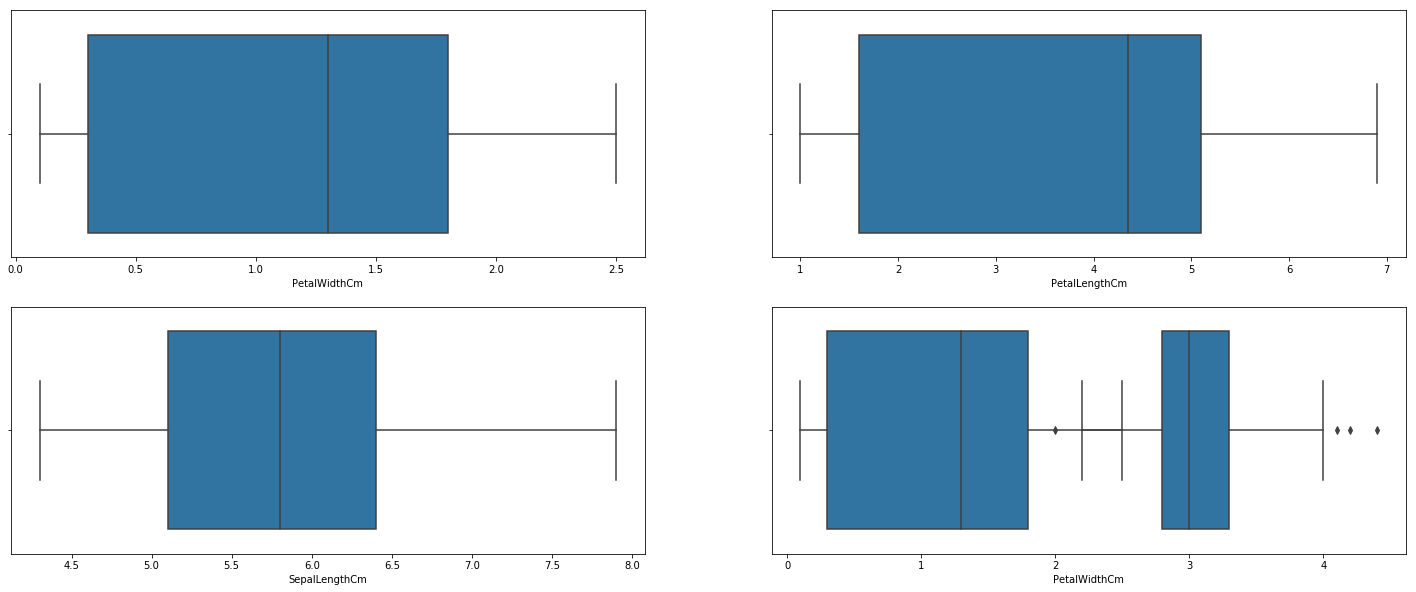

In [13]:
f = plt.figure(figsize=(25,10))
f.add_subplot(221)
sns.boxplot(x=X['PetalWidthCm'])
f.add_subplot(222)
sns.boxplot(x=X['PetalLengthCm'])
f.add_subplot(223)
sns.boxplot(x=X['SepalLengthCm'])
f.add_subplot(224)
sns.boxplot(x=X['SepalWidthCm'])


sns.boxplot(x=X['PetalWidthCm'])

In [14]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(X))

zee = (np.where(z > 2.5))[1]

print("number of data examples greater than 3 standard deviations = %i " % len(zee))

number of data examples greater than 3 standard deviations = 2 


In [26]:
data_delete = X[(z >= 2.5)]
data_delete.drop_duplicates(keep='first', inplace=True)
unique, count= np.unique(data_delete["Species"], return_counts=True)
print("The number of occurances of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )

The number of occurances of each class in the dataset = {1: 2}  



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
X = X[(z <= 2.5)]

In [28]:
y = X['Species']
X = X.drop(["Species"], axis = 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

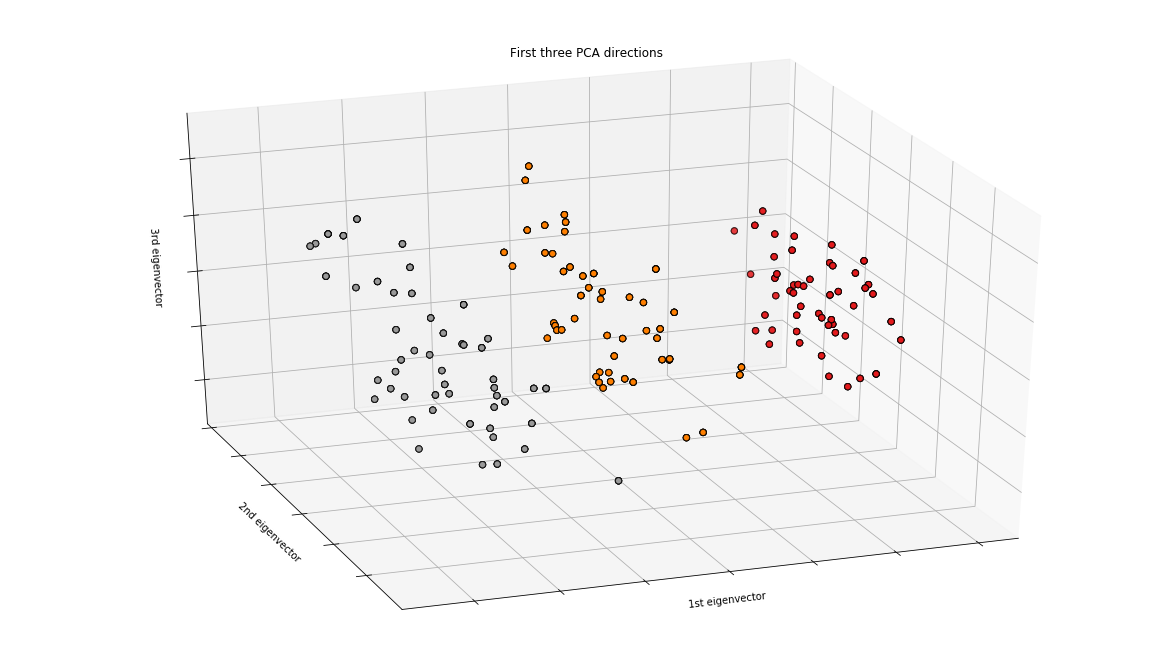

The number of features in the new subspace is  3


In [29]:
fig = plt.figure(1, figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_scaled)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
print("The number of features in the new subspace is " ,X_reduced.shape[1])

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                        X_reduced, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)
clf.fit(X_train,y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 1.00


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
    
c = np.logspace(start = -15, stop = 100, base = 1.02)
param_grid = {'C': c}


grid = GridSearchCV(clf, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
  
print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'C': 0.7430147299885189} with a score of 100
Best estimator accuracy on test set 100.00 


In [42]:
from sklearn.svm import SVC

clf_SVC = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
clf_SVC.fit(X_train,y_train)

print('Accuracy of SVC on training set: {:.2f}'.format(clf_SVC.score(X_train, y_train) * 100))

print('Accuracy of SVC on test set: {:.2f}'.format(clf_SVC.score(X_test, y_test) * 100))

Accuracy of SVC on training set: 100.00
Accuracy of SVC on test set: 100.00


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
    
c_SVC = np.logspace(start = 0, stop = 10, num = 100, base = 2 , dtype = 'float64')
print( 'the generated array of c values')
print ( c_SVC )
param_grid_S = {'C': c_SVC}



print("\n Array of means \n")
clf = GridSearchCV(clf_SVC, param_grid =param_grid_S, cv=20 , scoring='accuracy')
clf.fit(X_train, y_train)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
print(means)

y_true, y_pred = y_test, clf.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_true, y_pred))

the generated array of c values
[1.00000000e+00 1.07252413e+00 1.15030800e+00 1.23373308e+00
 1.32320850e+00 1.41917304e+00 1.52209732e+00 1.63248610e+00
 1.75088073e+00 1.87786182e+00 2.01405211e+00 2.16011948e+00
 2.31678026e+00 2.48480272e+00 2.66501086e+00 2.85828845e+00
 3.06558332e+00 3.28791207e+00 3.52636502e+00 3.78211156e+00
 4.05640590e+00 4.35059319e+00 4.66611616e+00 5.00452215e+00
 5.36747075e+00 5.75674188e+00 6.17424455e+00 6.62202624e+00
 7.10228290e+00 7.61736977e+00 8.16981285e+00 8.76232139e+00
 9.39780109e+00 1.00793684e+01 1.08103658e+01 1.15943781e+01
 1.24352503e+01 1.33371059e+01 1.43043679e+01 1.53417796e+01
 1.64544288e+01 1.76477719e+01 1.89276611e+01 2.03003732e+01
 2.17726400e+01 2.33516817e+01 2.50452420e+01 2.68616263e+01
 2.88097423e+01 3.08991436e+01 3.31400770e+01 3.55435321e+01
 3.81212958e+01 4.08860094e+01 4.38512315e+01 4.70315038e+01
 5.04424225e+01 5.41007151e+01 5.80243221e+01 6.22324854e+01
 6.67458420e+01 7.15865259e+01 7.67782761e+01 8.23465